# The Spark Foundation Network 
# Author: Muhammad Hassan
## Graduation Routational Inernship Program #GRIPOCT21 #GRIPOCTUBER21

## Exploratory Data Analysis - Retail

## Performance 'Exploratory Data Analysis' on dataset of 'SampleSales'

## What is Exploratory Data Analysis(EDA)?
If we want to explain EDA in simple terms, it means trying to understand the given data much better, so that we can make some sense out of it. 
Some insight into data.
Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
#### Basically EDA has three types
    1. Univariate analysis  it means Single varibal without consider relationship with other variable
    2. Bivariate analysis    It meanns two variabals together and look at the interaction/Relationship between them.
    3. Multivariate analysis Multivarible relationship with one another

## Importing the required Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the file by Pandas function

In [2]:
df = pd.read_csv('C:/Users/user/SampleSuperstore.csv')

In [3]:
df.head() # First 5 rows of dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print("Total Rows and Columns in the Dataset",df.shape) #total rows and columns in dataset

Total Rows and Columns in the Dataset (9994, 13)


## Is there any Null Values in dataset 

In [5]:
df.isnull().sum() #isnull() function detect missing values in the given series object

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

So zero means there is no any missing values

In [6]:
df.describe() #Satistical values of Numerical columns

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Correlation in Numerical columns and heatmap

In [7]:
df.corr() #Corelations in dataset

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


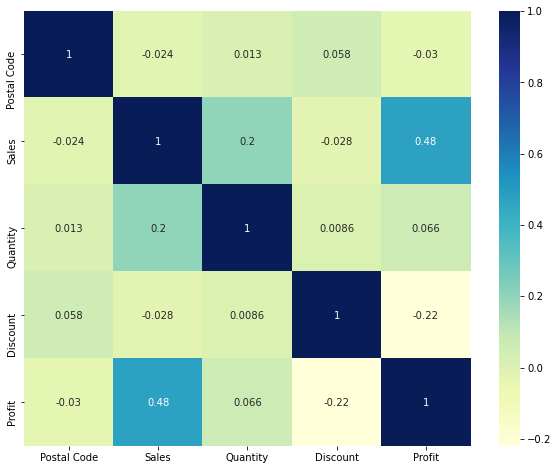

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True);

## PairPlot among Numerical Columns

In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
num_col = df[['Postal Code','Sales','Quantity','Discount','Profit']]
num_col.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


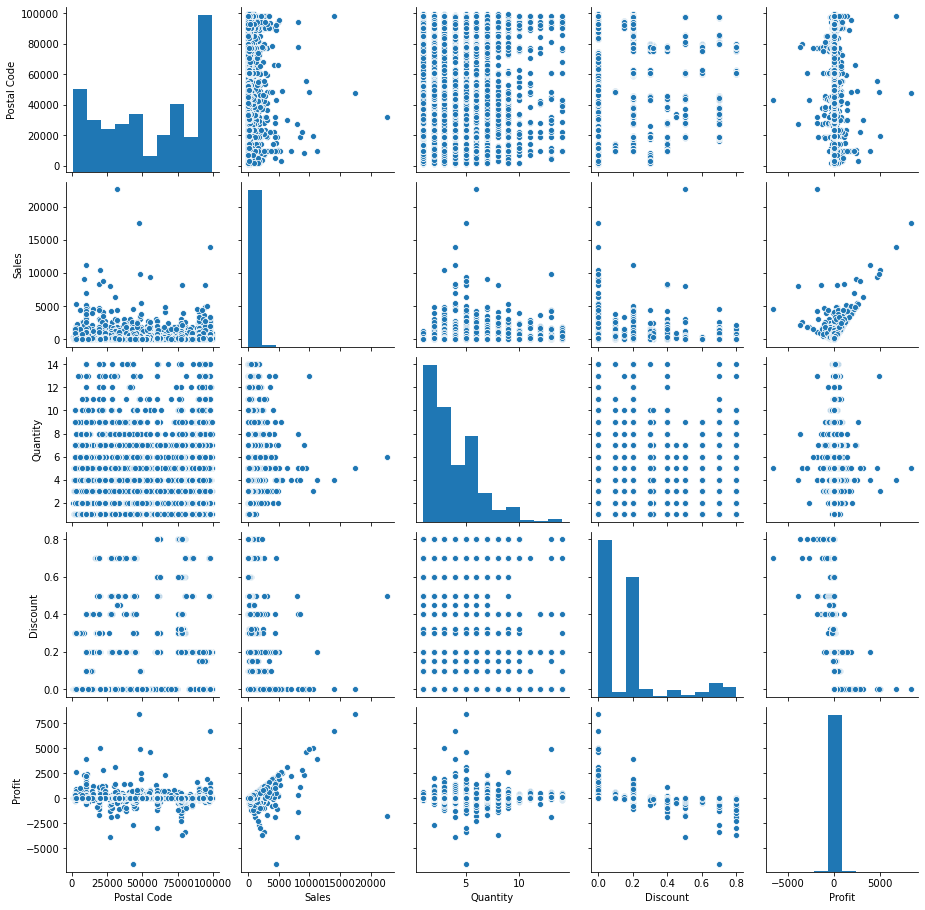

In [11]:
import seaborn as sns
sns.pairplot(num_col); #pairplot between numerical columns

## Numerical Analysis

In [12]:
df['City'].value_counts().sum() #How many cities are there

9994

so total 9994 cities are in dataset

In [13]:
df['Region'].value_counts() ## Regions vise data

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

### Regional vise data

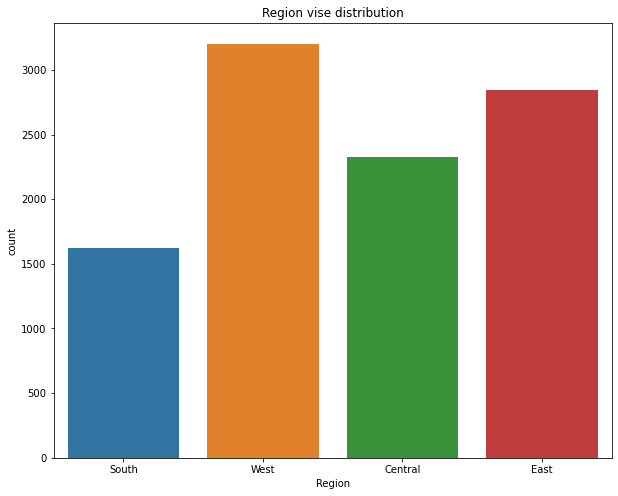

In [14]:
plt.figure(figsize=(10,8))
plt.title("Region vise distribution")
sns.countplot(x='Region', data=df);

In [15]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

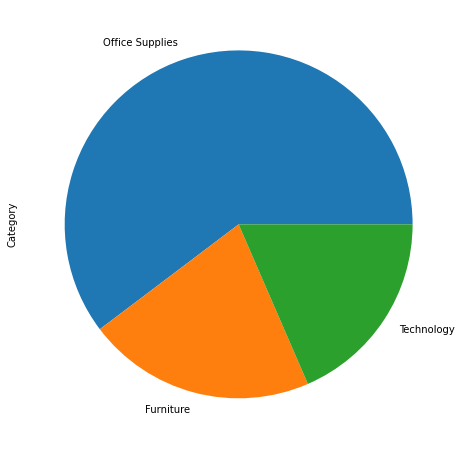

In [16]:
plt.figure(figsize=(10,8))
df.Category.value_counts(normalize=True)

#plot the pie chart of education categories
df.Category.value_counts(normalize=True).plot.pie();

### Q How many Sales are in region or which region has high sales

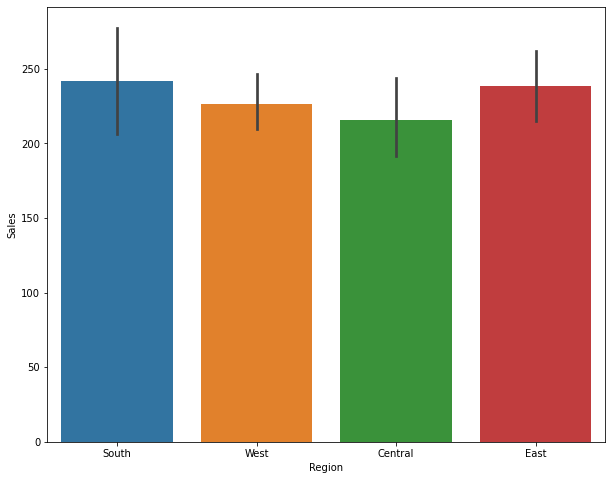

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x='Region',y='Sales', data=df);

So Sales wise South and East region are high as compare to West and Central

### Q Which Category has high Profit

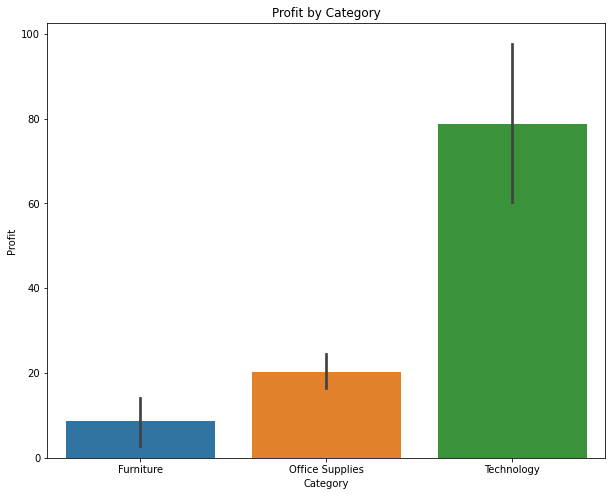

In [18]:
plt.figure(figsize=(10,8))
plt.title("Profit by Category")
sns.barplot(x='Category',y='Profit', data=df);

Category wise the Technology are very high profit as compare to Funiture and office and supplies category

### Which Category has high Discount

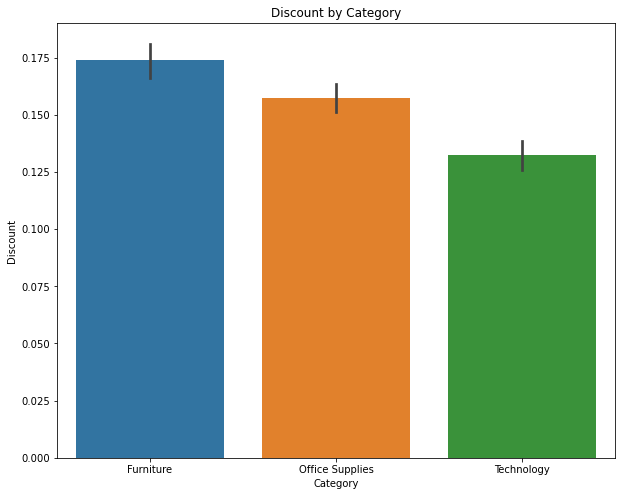

In [19]:
plt.figure(figsize=(10,8))
plt.title("Discount by Category")
sns.barplot(x='Category',y='Discount', data=df);

Funiture has given high Discounts

### Which Sub-Category has high Discount

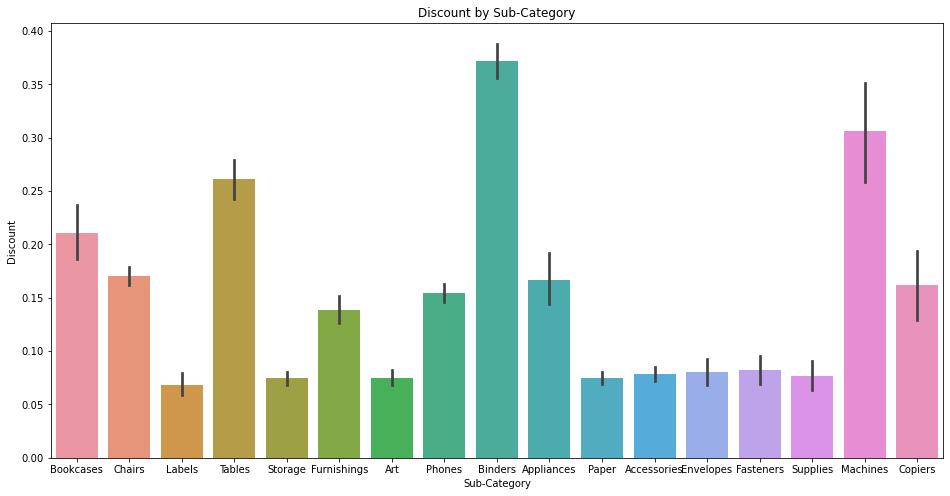

In [20]:
plt.figure(figsize=(16,8))
plt.title("Discount by Sub-Category")
sns.barplot(x='Sub-Category',y='Discount', data=df);

This is the sub-category wise distributions

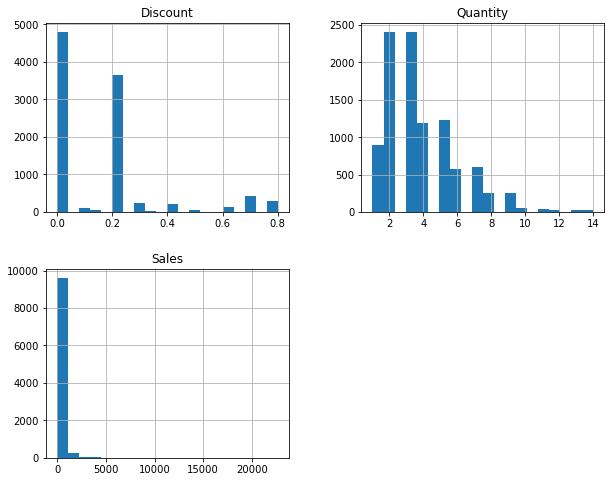

In [21]:
df[['Sales', 'Quantity','Discount']].hist(bins=20,figsize=(10, 8))
plt.show()

## Segments

In [22]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

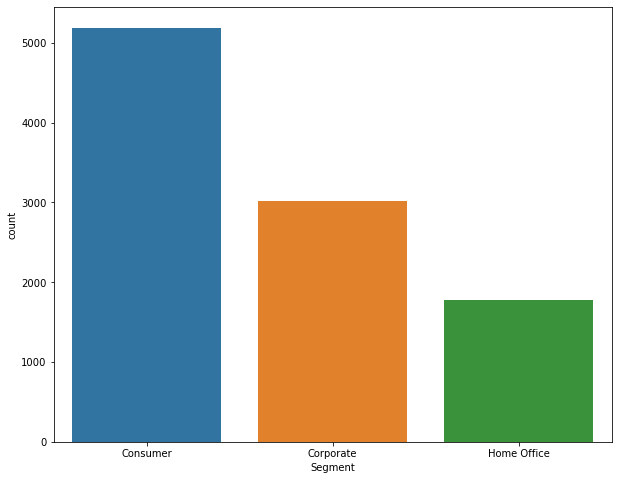

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x='Segment',data=df);

### Segment vise Discounts

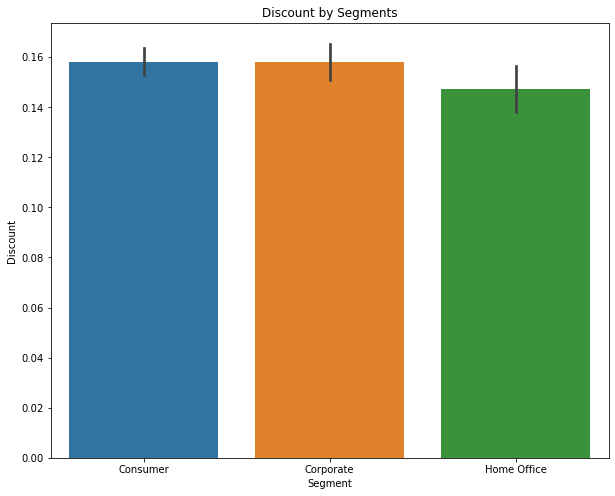

In [24]:
plt.figure(figsize=(10,8))
plt.title("Discount by Segments")
sns.barplot(x='Segment',y='Discount', data=df);

Discount are same in Segments of Consumer, Corporate segment and home office

### Segment vise Profits

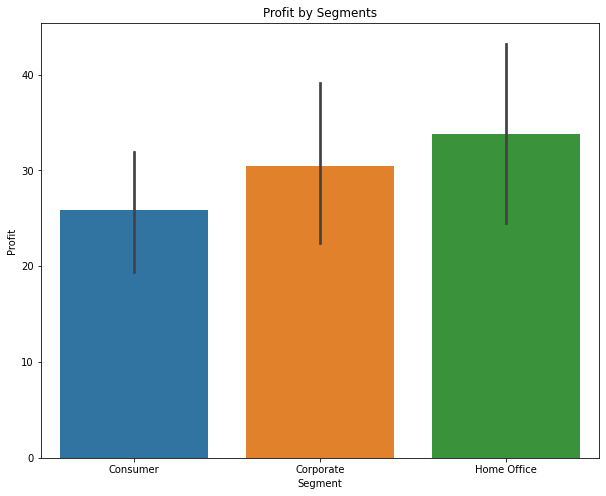

In [25]:
plt.figure(figsize=(10,8))
plt.title("Profit by Segments")
sns.barplot(x='Segment',y='Profit', data=df);

Profit wise distribution of Segment so the Home office are higher than Consummer and Corporate